In [3]:
import numpy as np

In [2]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv('fct_invoice.csv')
print(df1)

      invoice_no  customer_id         category  quantity    price  \
0        I138884          229         Clothing         5  1500.40   
1        I317333         3433            Shoes         3  1800.51   
2        I127801          644         Clothing         1   300.08   
3        I173702         4900            Shoes         5  3000.85   
4        I337046         1089            Books         4    60.60   
...          ...          ...              ...       ...      ...   
99452    I219422         2344         Souvenir         5    58.65   
99453    I325143          172  Food & Beverage         2    10.46   
99454    I824010          425  Food & Beverage         2    10.46   
99455    I702964          577       Technology         4  4200.00   
99456    I232867           30         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
0        Credit Card     5/8/2022            Kanyon  
1         Debit Card   12/12/2021    Forum Istanbul  
2        

In [6]:
df2 = pd.read_json('dim_customer.json')
print(df2)

       age first_name gender     id last_name
0     48.0   Nicholas      M      0    Flores
1      NaN    Jeffery      M      1      Rowe
2     57.0     Alexis      F      2    Benton
3     73.0        Amy      F      3   Johnson
4     20.0      David      M      4     Moore
...    ...        ...    ...    ...       ...
5186   NaN     Arthur      M   9428    Harris
5187   NaN      David      M   9494       Roy
5188  85.0     Thomas      M  10350    Turner
5189   NaN      April      F  10587   Sanchez
5190   NaN     Andrew      M  10934   Compton

[5191 rows x 5 columns]


# Easy

### 1. How many unique customers are in the dataset?

In [7]:
df2['Full Name'] = df2['first_name'] + " " + df2['last_name']

print(df2)

       age first_name gender     id last_name        Full Name
0     48.0   Nicholas      M      0    Flores  Nicholas Flores
1      NaN    Jeffery      M      1      Rowe     Jeffery Rowe
2     57.0     Alexis      F      2    Benton    Alexis Benton
3     73.0        Amy      F      3   Johnson      Amy Johnson
4     20.0      David      M      4     Moore      David Moore
...    ...        ...    ...    ...       ...              ...
5186   NaN     Arthur      M   9428    Harris    Arthur Harris
5187   NaN      David      M   9494       Roy        David Roy
5188  85.0     Thomas      M  10350    Turner    Thomas Turner
5189   NaN      April      F  10587   Sanchez    April Sanchez
5190   NaN     Andrew      M  10934   Compton   Andrew Compton

[5191 rows x 6 columns]


In [8]:
df2.to_json('modified_dim_customer.json')

In [9]:
df2 = pd.read_json('modified_dim_customer.json')

In [10]:
df2['Full Name'].nunique()

4992

There are 4992 unique customers.

### 2. What are the different categories of products available? How many unique categories are there? 

In [11]:
df1['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [12]:
df1['category'].nunique()

8

The different categories of products available are: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, and Souvenir. There are 8 unique categories.

### 3. Which payment method is the most popular? How many times was it used? 

In [13]:
df1.groupby(['payment_method']).count()['invoice_no'].sort_values(ascending=False)

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: invoice_no, dtype: int64

The most popular payment method is Cash. It was used 44,447 times.

# Medium

### 1. What are the three most popular categories, by total sales?

In [14]:
df1.groupby(['category']).sum(['price']).sort_values('price',ascending=False)['price']

category
Clothing           31075684.64
Shoes              18135336.89
Technology         15772050.00
Cosmetics           1848606.90
Toys                1086704.64
Food & Beverage      231568.71
Books                226977.30
Souvenir             174436.83
Name: price, dtype: float64

The three most popular categories, by total sales, are:
1. Clothing (31075684.64)
2. Shoes (18135336.89)
3. Technology (15772050.00)

### 2. What are the total sales attributed to customers over the age of 45?

In [15]:
joined_df = pd.merge(df1, df2, left_on = "customer_id", right_on = "id")

In [17]:
joined_df.to_csv('joined_data.csv')

In [18]:
joined_df = pd.read_csv('joined_data.csv')

In [19]:
filtered_df = joined_df[joined_df['age']>45] 

In [20]:
filtered_df.to_json('filtered_dim_customer.json')

In [21]:
filtered_df = pd.read_json('filtered_dim_customer.json')

In [22]:
filtered_df['price'].sum()

22370553.27

The total sales attributed to customers over the age of 45 is 22370553.27

### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.) 

In [23]:
import matplotlib.dates as mdates
from datetime import datetime

In [24]:
joined_df['invoice_date'] = pd.to_datetime(joined_df['invoice_date'], format='%d/%m/%Y')
joined_df['year_month'] = joined_df['invoice_date'].dt.strftime('%Y/%m')

Text(0.5, 1.0, 'Number of Orders')

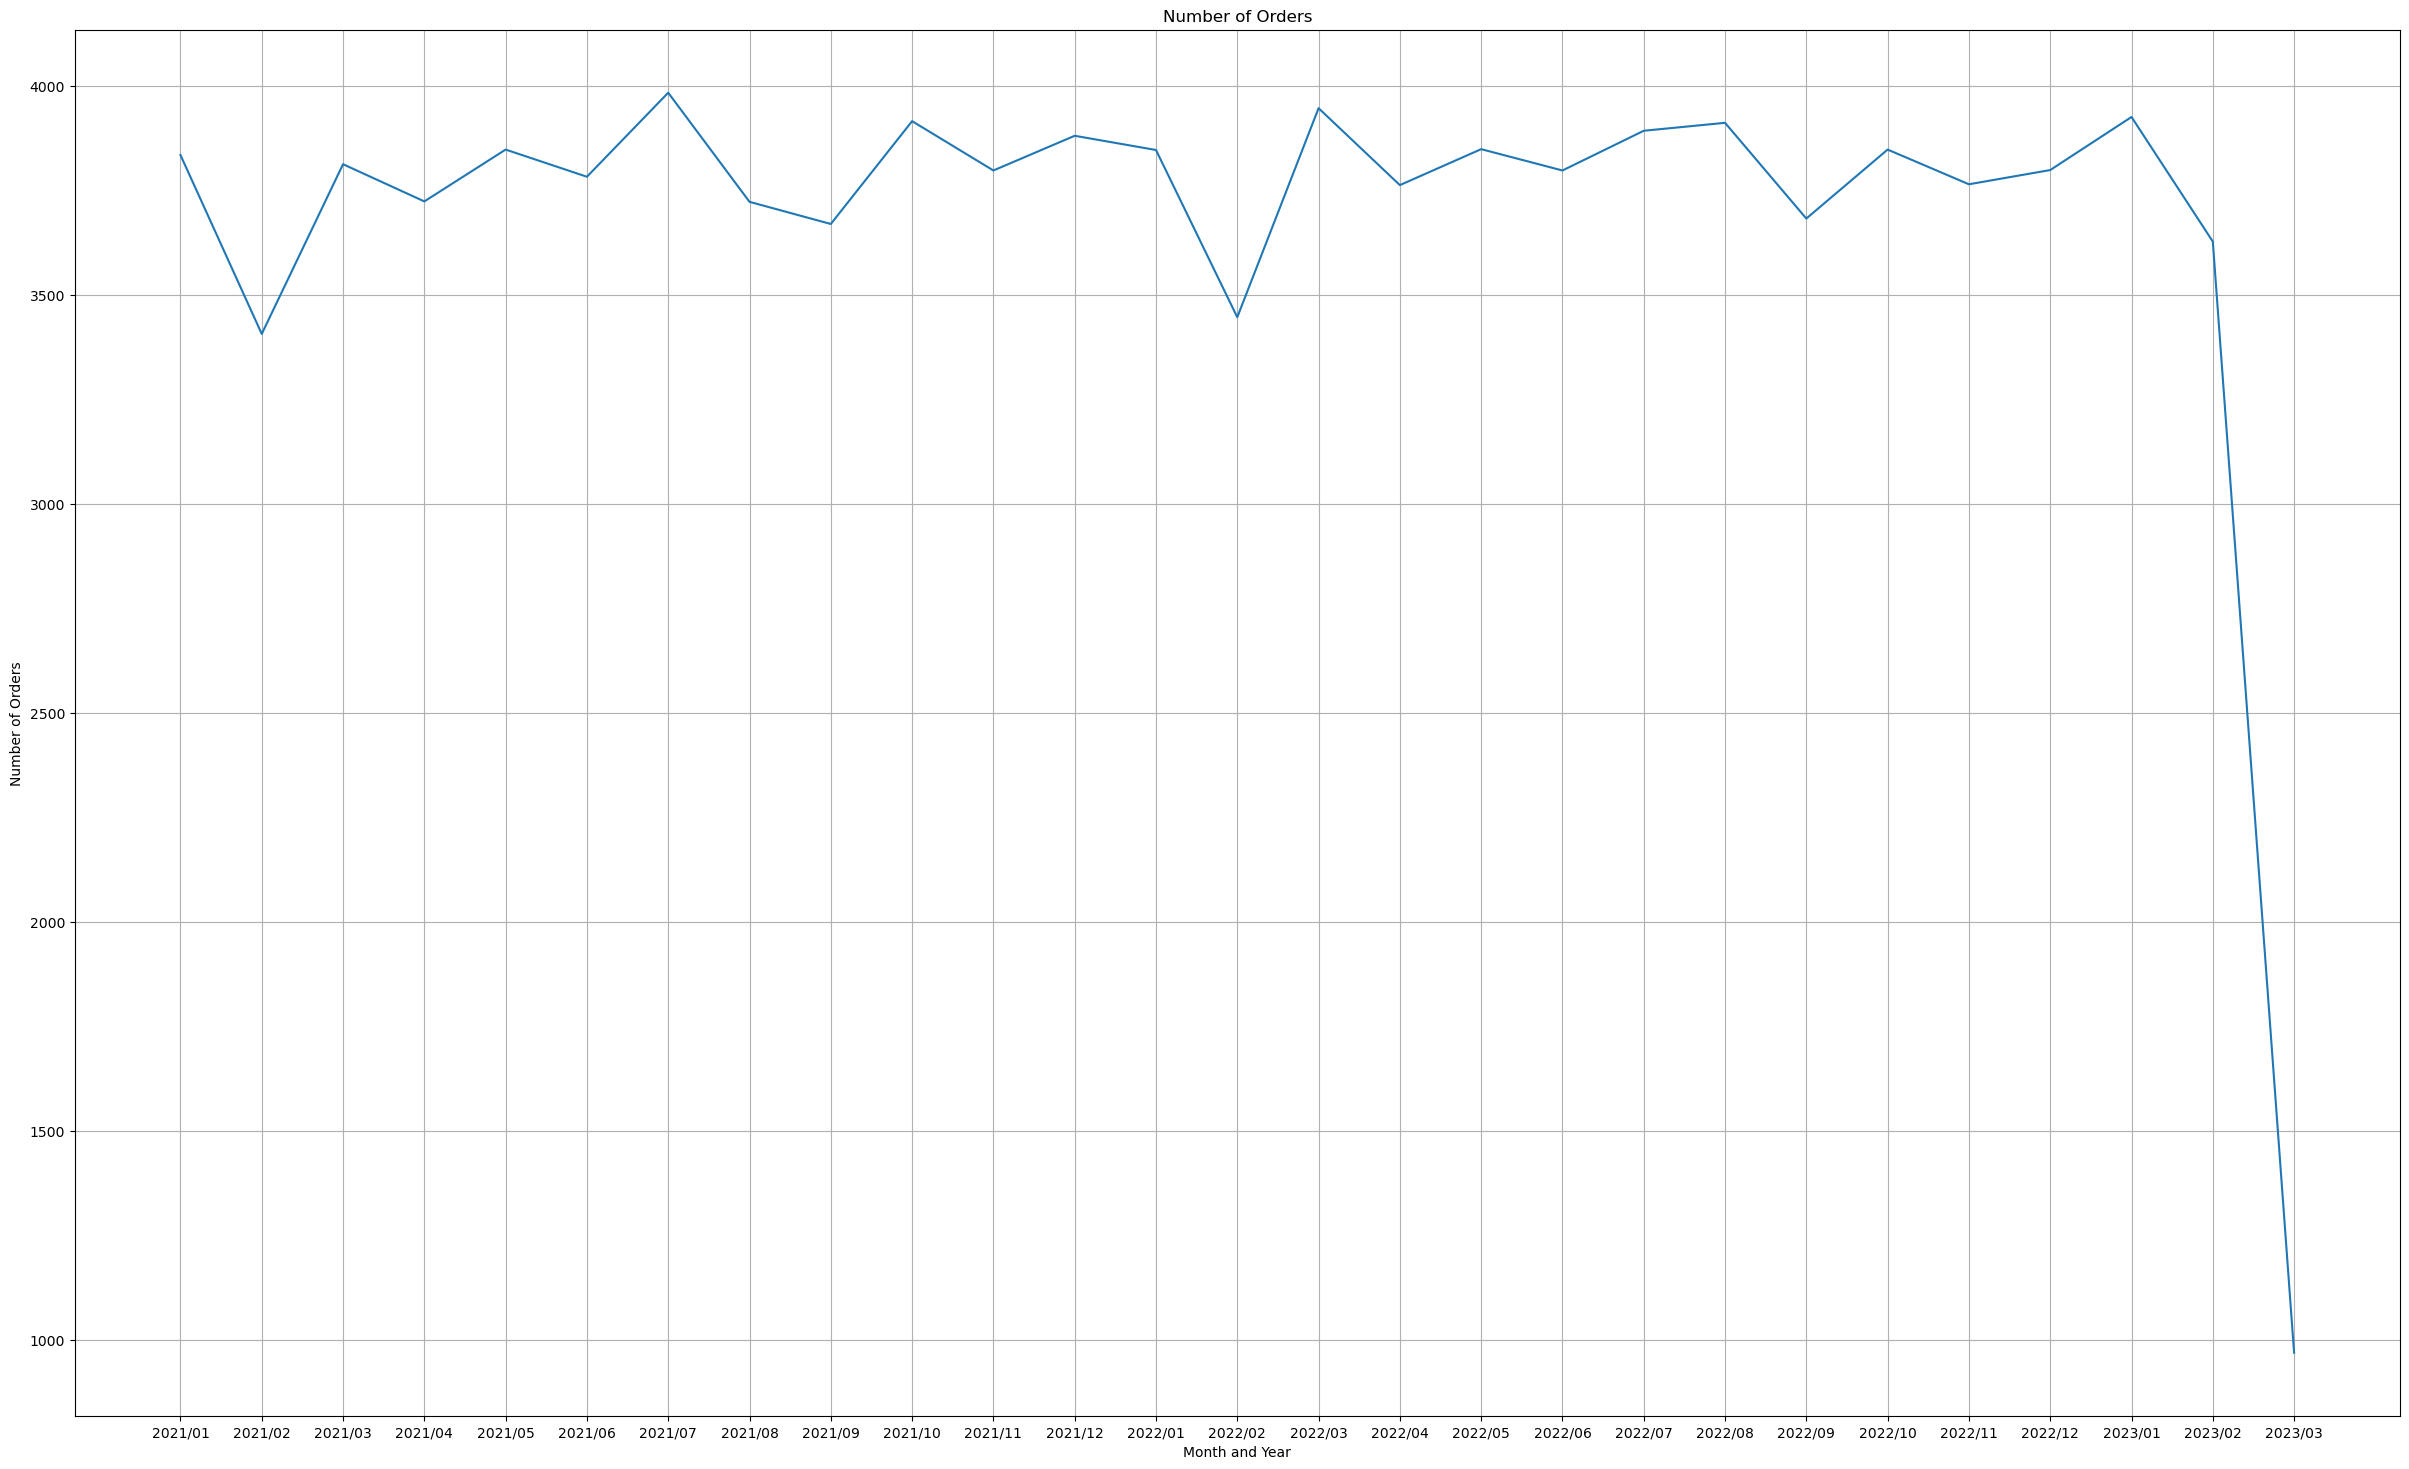

In [30]:
x = joined_df.groupby(['year_month'])
y = joined_df.groupby(['year_month']).count()['invoice_no']

x_values = x.groups.keys()
y_values = y.values

plt.figure(figsize=(30, 18))
plt.plot(x_values,y_values)
plt.grid()
plt.xlabel('Month and Year')
plt.ylabel('Number of Orders')
plt.title('Number of Orders')

/var/folders/0v/ht89bzqj4pq9kcvpfgdy2cph0000gn/T/ipykernel_53999/1305950025.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = joined_df.groupby(['year_month']).sum()['price']


Text(0.5, 1.0, 'Amount of Sales')

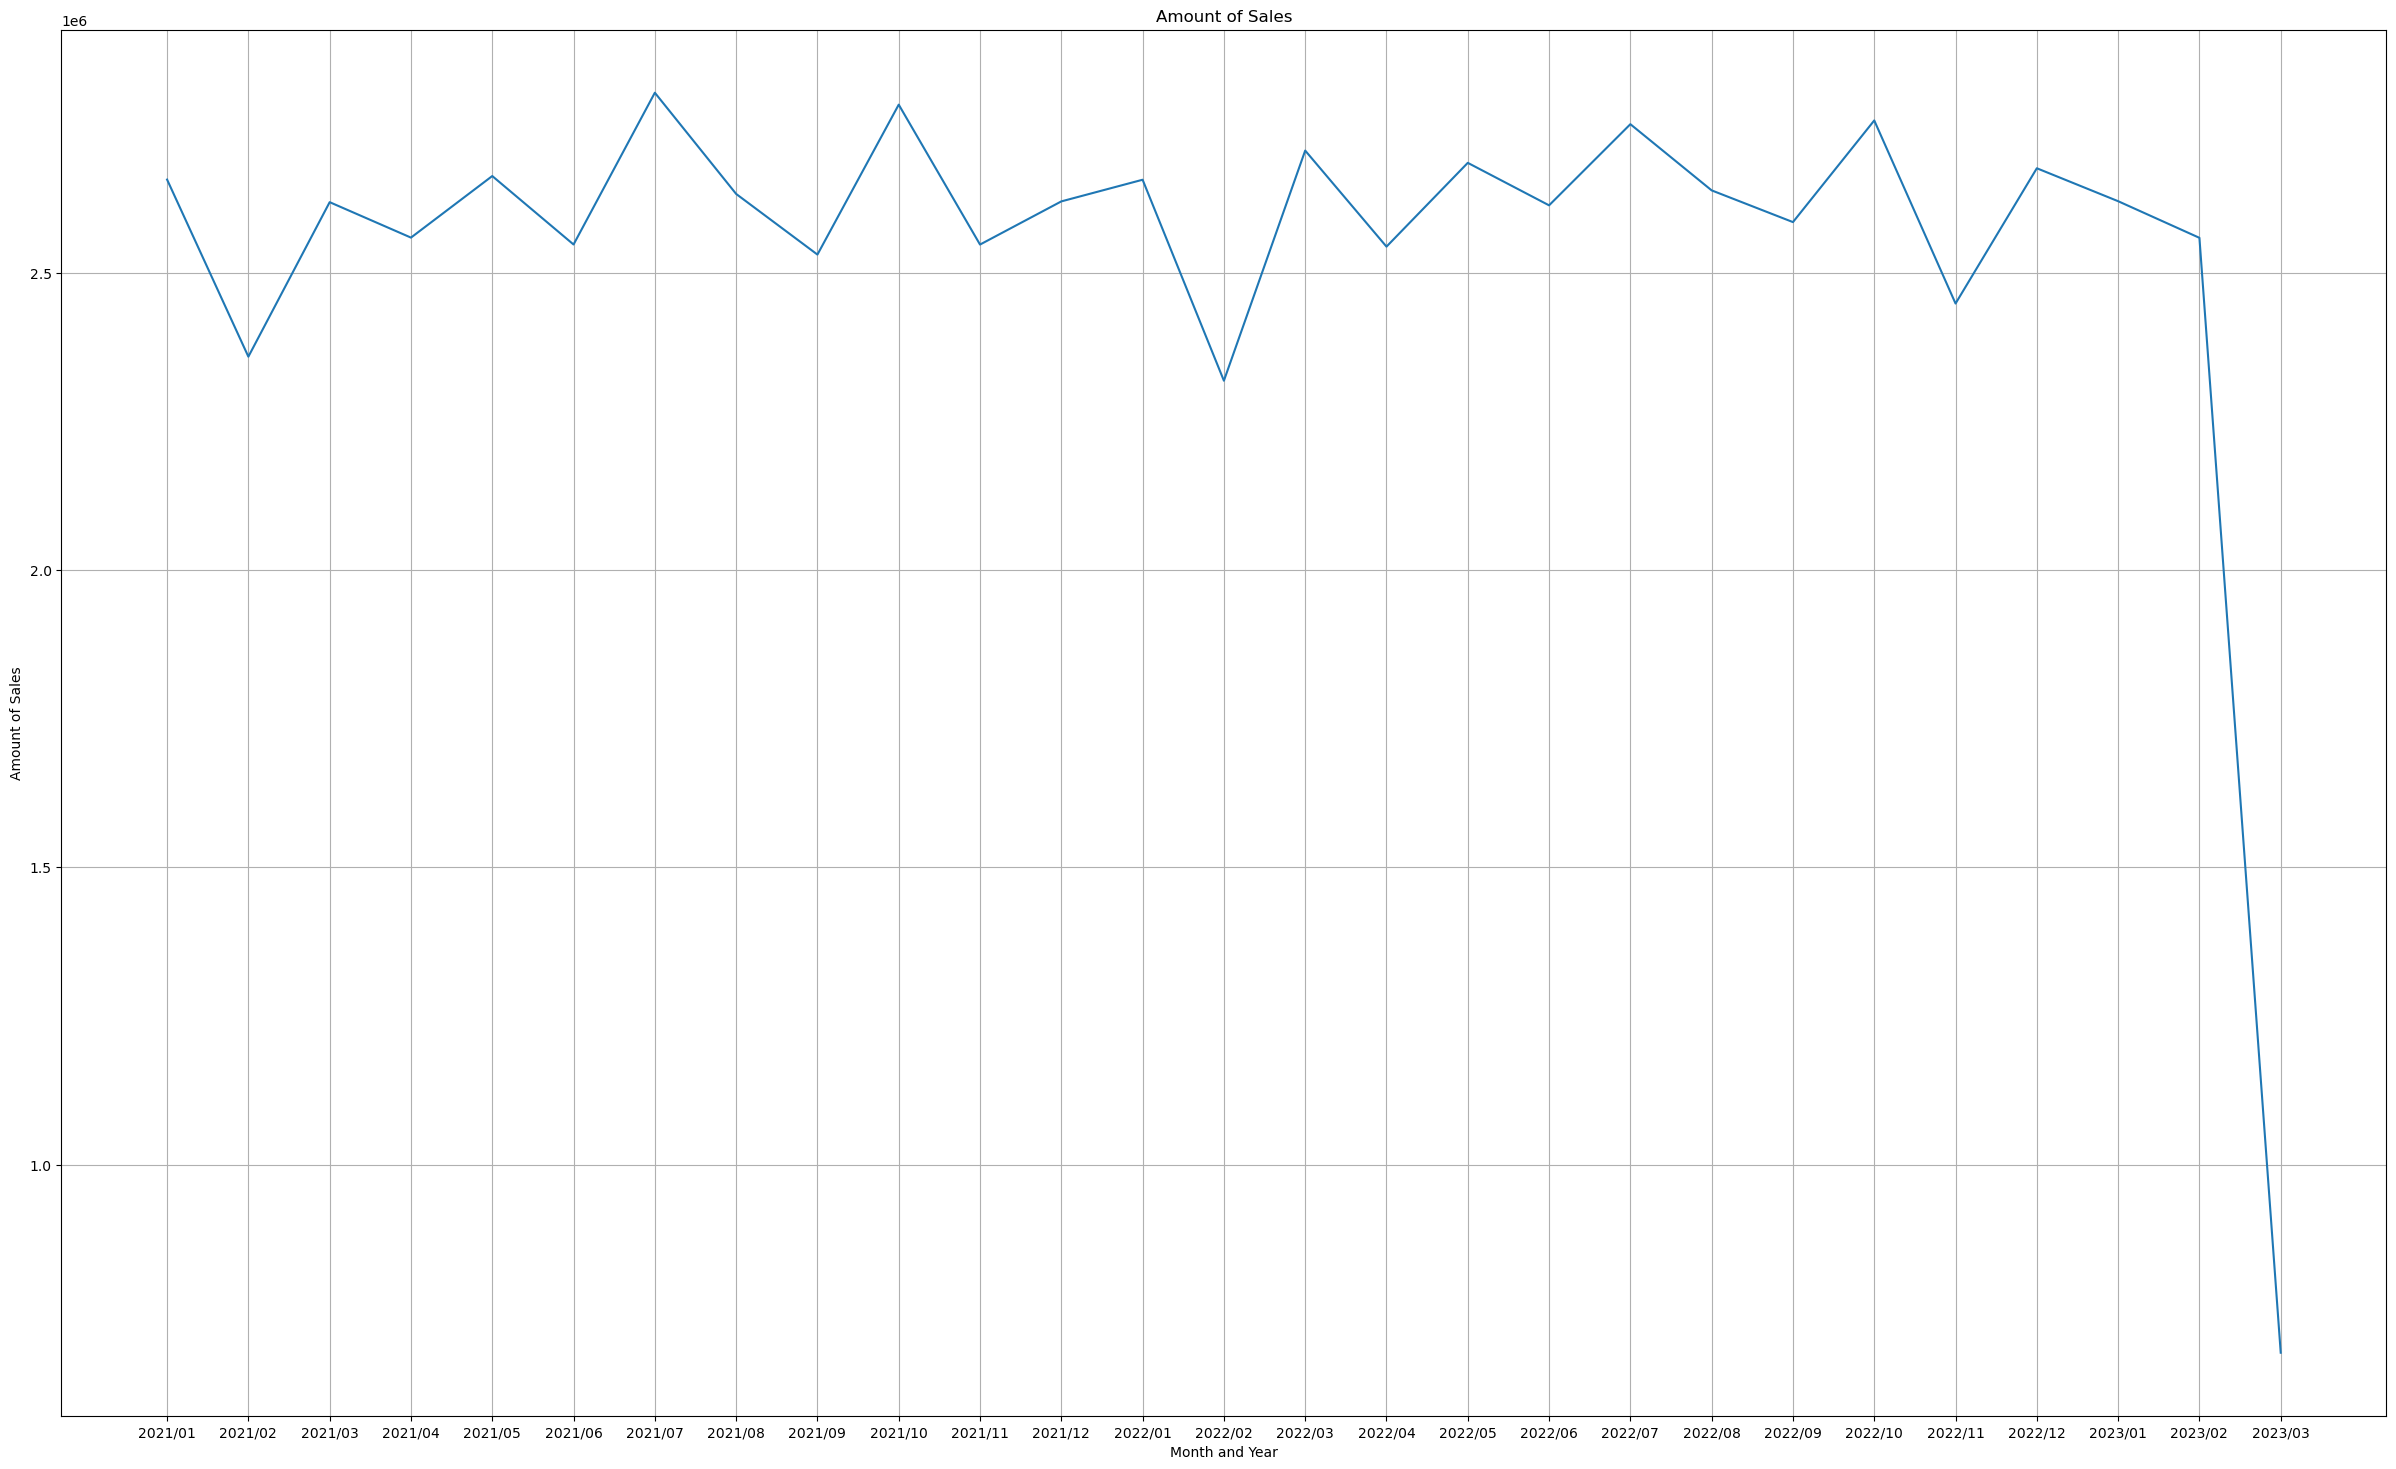

In [40]:
x = joined_df.groupby(['year_month'])
y = joined_df.groupby(['year_month']).sum()['price']

x_values = x.groups.keys()
y_values = y.values

plt.figure(figsize=(30, 18))
plt.plot(x_values,y_values)
plt.grid()
plt.xlabel('Month and Year')
plt.ylabel('Amount of Sales')
plt.title('Amount of Sales')

The month of February always has the fastest rate of decline in orders from the previous month. Among all the months, February had the least sales and number of orders in both 2021 and 2022. The 2023 data is still incomplete, but it also exprienced a decrease in sales and in the number of orders from January. Then, March has the sharpest increase in sales and orders from February in both 2021 and 2022. However, the database does not include all orders for March 2023, which explains the suddent plummeting of sales and orders. 

# Hard

### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [28]:
age_range = pd.cut(joined_df['age'], bins = [9, 19, 29, 39, 49, 59, 69, 79, 89], labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89'])
pivot_table = joined_df.pivot_table(values = 'price', index = 'category', columns = age_range, aggfunc = np.sum)

In [30]:
print(pivot_table)

age                  10-19       20-29       30-39       40-49       50-59  \
category                                                                     
Books              3469.35    21619.05    22997.70    23361.30    20664.60   
Clothing         518238.16  2818351.36  3074919.76  3066817.60  2803647.44   
Cosmetics         29681.80   165079.60   198054.86   181343.60   160932.28   
Food & Beverage    3645.31    20428.38    23744.20    24460.71    19999.52   
Shoes            274277.69  1630061.72  1912141.62  1889335.16  1591650.84   
Souvenir           3296.13    15295.92    17548.08    17759.22    15084.78   
Technology       287700.00  1426950.00  1669500.00  1630650.00  1220100.00   
Toys              17203.20   102466.56   115297.28   106910.72    94115.84   

age                   60-69       70-79       80-89  
category                                             
Books              21513.00    15437.85     7575.00  
Clothing         2910776.00  2117064.40  1228827.60  
Cos